# Algorithm


- $x(k+1)=x(k)$
	- $- \beta_g \nabla F(x(k))$
		- gradient descent for *current gradient*
	- $- \beta_{pg} \nabla F(x(k) + \beta_g\nabla F(x(k))$
		- gradient descent for *projected past gradient* 
	- $- \beta_{fg} \nabla F(x(k) - \beta_g\nabla F(x(k))$
		- gradient descent for *projected future gradient*


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import jax

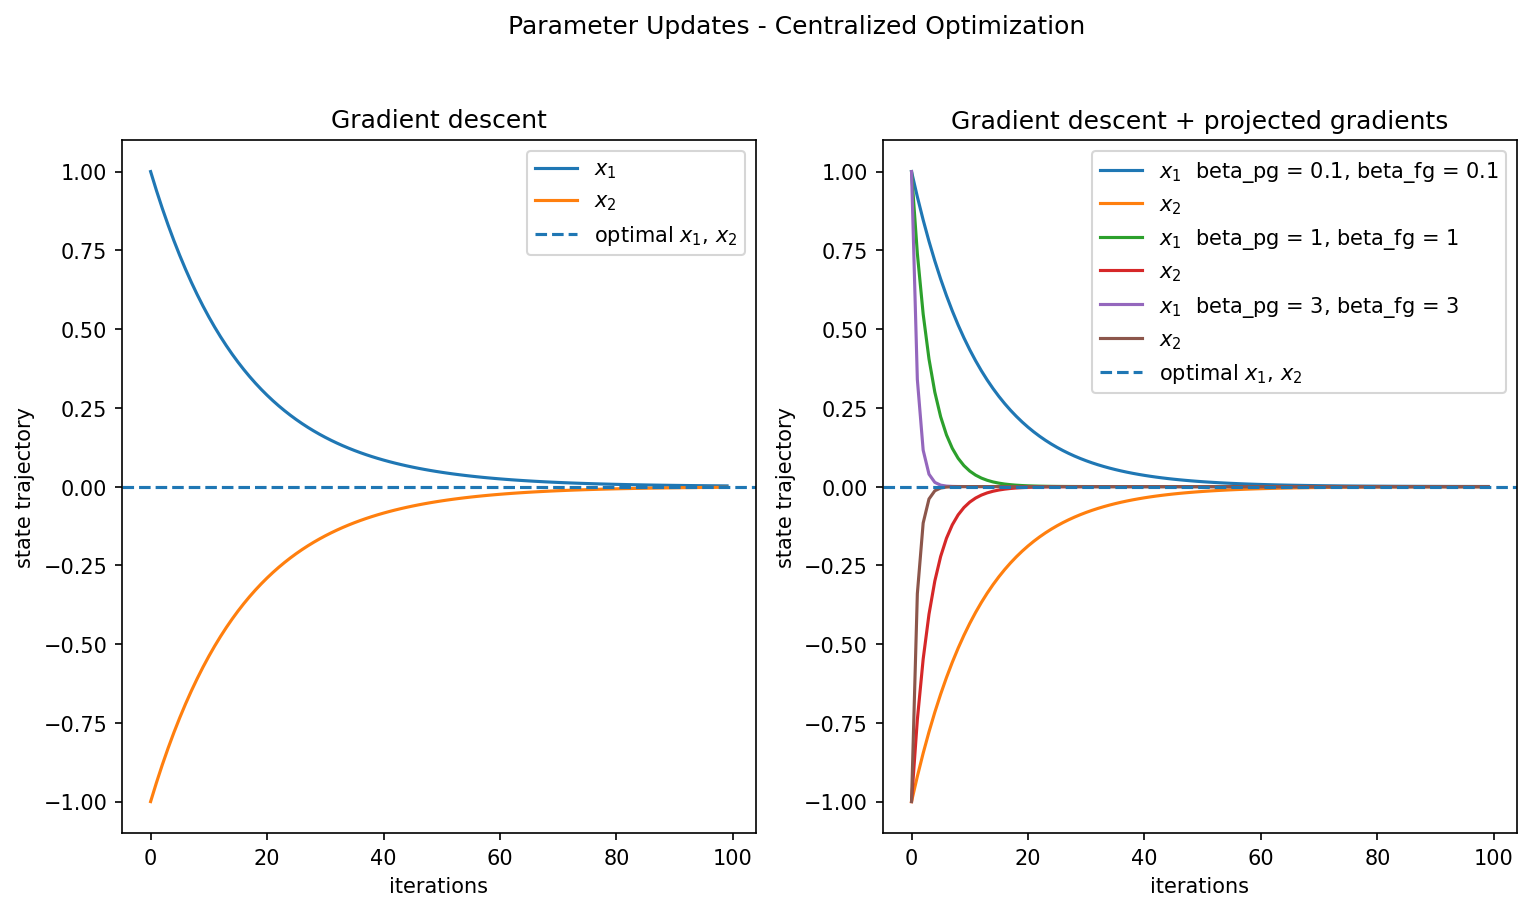

In [24]:

def get_gradientVector(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)


def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2


fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)



optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * get_gradientVector([x1, x2])[0]
    x2 = x2 - learning_rate * get_gradientVector([x1, x2])[1]



# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()



beta_g = learning_rate
betas_pg = [ 0.1, 1, 3] 
betas_fg = [ 0.1, 1, 3] 


# betas_memory = [0.01, 0.05, 0.1]

# for beta_memory in betas_memory:

for beta_pg, beta_fg in zip(betas_pg, betas_pg):

    x1, x2 = 1., -1.
    history_x1 = []
    history_x2 = []

    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        x1_currentGradient = get_gradientVector([x1, x2])[0]
        x2_currentGradient = get_gradientVector([x1, x2])[1]

        x1 = x1 - beta_g * x1_currentGradient  \
                - beta_pg * get_gradientVector([x1 + beta_g * x1_currentGradient, x2])[0] \
                - beta_fg * get_gradientVector([x1 - beta_g * x1_currentGradient, x2])[0]

        x2 = x2 - beta_g * x2_currentGradient  \
                - beta_pg * get_gradientVector([x1, x2 + beta_g * x2_currentGradient])[1] \
                - beta_fg * get_gradientVector([x1, x2 - beta_g * x2_currentGradient])[1]

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$  beta_pg = {beta_pg}, beta_fg = {beta_fg}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")

axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

axs[1].set_title(f"Gradient descent + projected gradients")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()



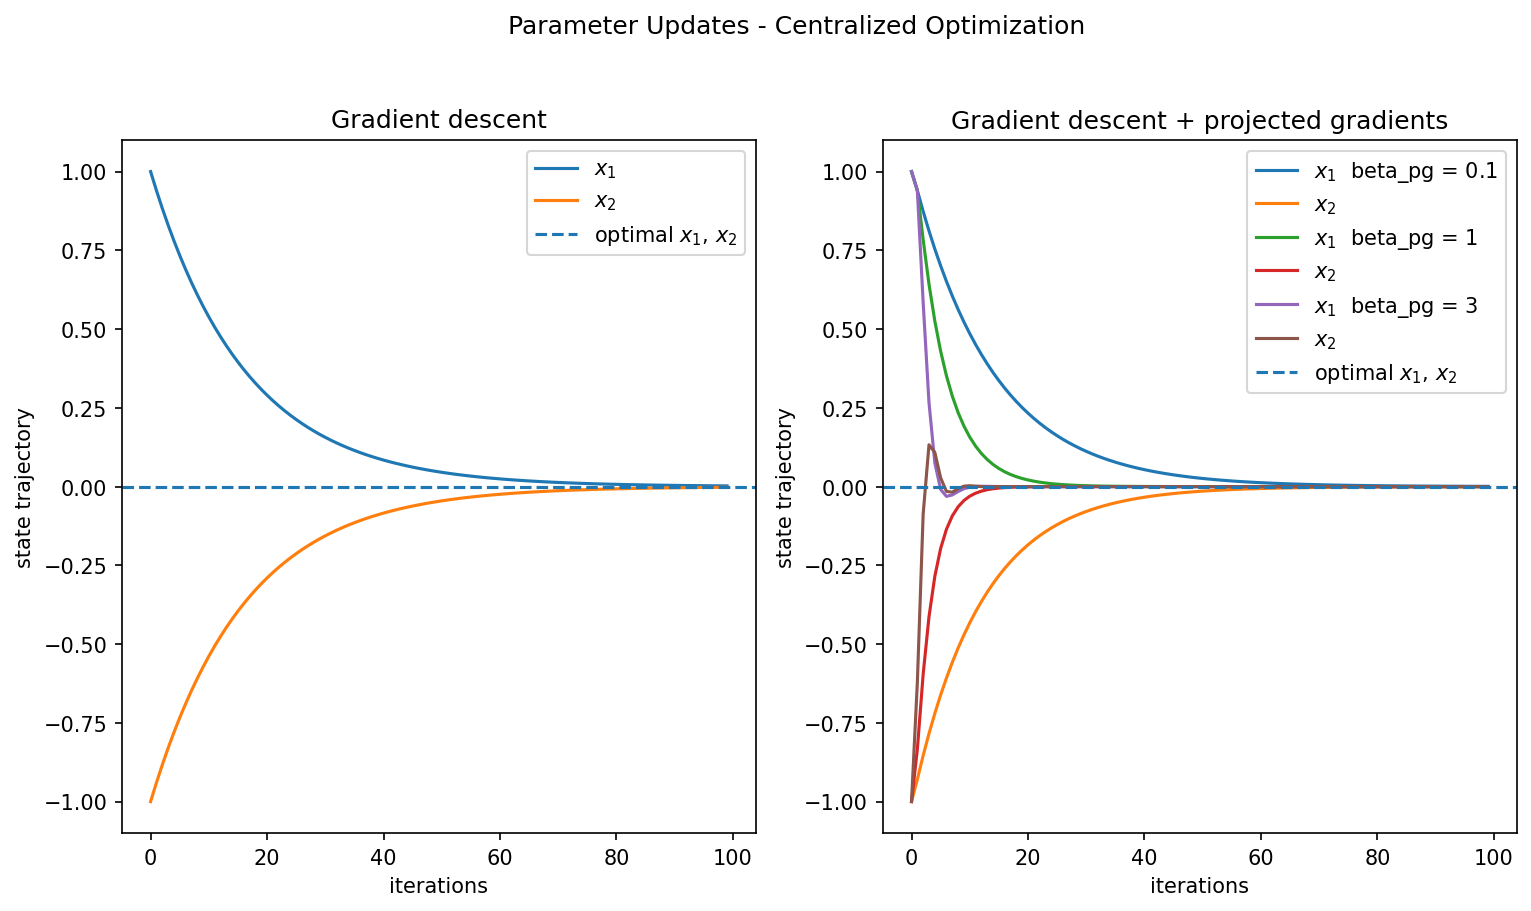

In [27]:

def get_gradientVector(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)


def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2


fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)



optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * get_gradientVector([x1, x2])[0]
    x2 = x2 - learning_rate * get_gradientVector([x1, x2])[1]



# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()



beta_g = learning_rate
betas_pg = [ 0.1, 1, 3] 
betas_fg = [ 0.1, 1, 3] 


# betas_memory = [0.01, 0.05, 0.1]

# for beta_memory in betas_memory:

for beta_pg in betas_pg:

    x1, x2 = 1., -1.
    history_x1 = []
    history_x2 = []

    x1_lastGradient = 0
    x2_lastGradient = 0

    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        x1_currentGradient = get_gradientVector([x1, x2])[0]
        x2_currentGradient = get_gradientVector([x1, x2])[1]

        x1 = x1 - beta_g * x1_currentGradient  \
                - beta_pg * x1_lastGradient

        x2 = x2 - beta_g * x2_currentGradient  \
                - beta_pg * get_gradientVector([x1, x2 + beta_g * x2_currentGradient])[1] \
                - beta_pg * x2_lastGradient

        x1_lastGradient = x1_currentGradient
        x2_lastGradient = x2_currentGradient


    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$  beta_pg = {beta_pg}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")

axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

axs[1].set_title(f"Gradient descent + projected gradients")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()

